# Forschungsprojekt Endboss der Uni <!-- test -->

## Aufbau

1. [Einführung](#einführung)
    1. [Hintergrund](#hintergrund)
    2. [Fragestellungen und Erwartungen](#fragen)
    3. [Methoden](#methoden)
2. [Laden der Daten](#laden)
3. [Visualisieren der Recordings](#vis_rec)
4. [Visualisieren der Stimuli](#vis_stim)
5. [Erstellung der ROC-Curve](#curve)
5. [Diskussion](#diskussion)

## Einleitung <a name="einleitung"></a>

### Hintergrund <a name="hintergrund"></a> 
Ziel dieses Projektes ist es einen Datensatz aus Spike Train Recordings von Wanderheuschrecken (Locusta migratoria) zu visualisieren und untersuchen. 
Dabei wurden Aktionspotentiale von Nervenzellen der Wanderheuschrecken mittels ihrer Axonen in Hörrezeptoren aufgezeichnet. Die Heuschrecken wurden inmitten zweier Lautsprecher platziert die 60cm Abstand voneinander hatten. Jeder audio-Reiz wurden mit einer Rate von 100kHz von dem jeweiligen Lautsprecher apgespielt, der ipsilateral zu den beobachteten Nerven stand. Die Experimente wurden an Zellen mit verschiedenen Frequenz-präferenzen durchgeführt. Die Präferenz der jeweiligen Zellen wurde mittels der f-I-Kurve der spezifischen Zelle ermittelt. f-I-Kurve steht für "Frequenz-Stromfluss-Kurve", sie zeigt den synaptischen Stromfluss eines Neurons in Bezug auf dessen Feuerrate. Sämtliche anschließenden Experimente wurden mittels eines reinen Tons in der bevorzugten Frequenz der Zelle durchgeführt. 
<!-- Bild f-I-Kurve suchen -->

### Fragestellungen und Erwartungen <a name="fragen"></a> 

Dieses Projekt bezieht sich auf Receiver-Operating-Characteristic-Curves, kurz ROC-Curves. Um ROC-Curves zu verstehen muss zuerst erklärt werden, wie unterschiedliche Ergebnisse in der Statistik differenziert werden können. 

Sei zum Beispiel r eine gemessene Feuerrate während eines Versuches an einer Nervenzelle. Diese Feuerrate wird mit einem Schwellenwert z verglichen. Ist r größergleich z, gibt unser Test das Ergebnis "Plus". "Plus" als Testergebnis heißt, dass der Test behauptet, dass der Stimulus sich in die präferierte Richtung des Neurons bewegt.

Reagiert eine Nervenzelle im visuellen Bereich zum Beispiel bevorzugt auf beobachtete Bewegungen "nach rechts" in der realen Welt, dann möchten wir von dem Test ein "Plus"-Ergebnis erhalten, wenn ein Objekt vor dem Probanden nach rechts bewegt wird und ein "Minus"-Ergebnis, wenn sich das Objekt nach links bewegt. 
<!-- Eventuell cut this^  Als "allgemeinere/verständlichere" Erklärung noch aufgeschrieben -->

 Die Wahrscheinlichkeit ein korrektes "Plus"-Ergebnis zu erhalten wird geschrieben als β(z)=P[r≥z|+], und wird im Allgemeinen als "Hit", "Hit rate", oder "Power" des Tests bezeichnet. Außerdem ist die Definition α(z)=P[r≥z|-] wichtig. α wird auch "Size", oder "False alarm rate" des Tests genannt. In Worten beschrieben gibt α die Wahrscheinlichkeit an, dass der Test fälschlicherweise einen "Plus"-Stimulus wiedergibt, obwohl in Wirklichkeit ein "Minus"-Stimulus, also ein Stimulus der sich entgegengesetzt der präferierten Richtung des Neurons bewegt, vorliegt. Folglich schließt sich, dass die Wahrscheinlichkeit einen "Plus"-Stimulus inkorrekt vom Test identifiziert zu bekommen 1-β ist, und die Wahrscheinlichkeit einen "Minus"-Stimulus korrekt zu identifizieren mittels 1-α gegeben ist.
In all diesen Fällen soll z ein Wert sein, für den die Hit-Rate des Tests maximal groß, und gleichzeitig die False-Alarm-Rate so niedrig wie möglich gehalten werden soll.


Da der Schwellenwert z frei wählbar ist, werden ROC-Curves als Veranschaulichung genutzt. 
Jeder Punkt auf einer ROC-Curve korrespondiert zu einem spezifischen Wert für z. Damit erhalten wir eine visualisierte "Size-to-Power-ratio". 
Die x-Koordinate des Punktes ist die "Size" des Tests α für diesen Wert z. Die y-Koordinate des Punktes korrespondiert zu der "Power" des Tests β für diesen Wert z.
<p align="center">
<img width="400" src="Resources/ROC.png">
</p>

Da der Schwellenwert z kontinuierlich variiert wird, erhalten wir mittels all den einzelnen Punkten eine komplette ROC-Curve.

Beispiele für extreme z-Werte: 

Sei z=0, so wird die Feuerrate r immer größergleich z sein. Damit ist α=β=1, wir finden diesen Punkt an der oberen rechten Grenze der ROC-Curve.
Im anderen Extremfall, für sehr große z wird r immer kleiner sein als z. Hier erhalten wir immer "Minus" als Testergebnis. Dieser Punkt ist an der unteren linken Grenze der ROC-Curve sichtbar.
In beiden Fällen kann man richtige Testergebnisse nicht von Falschen unterscheiden.

Zwischen diesen beiden Extremwerten für z bildet sich die ROC-Curve als eine Funktion von z.
Die besten Schwellwerte sind so weit oben links wie möglich, da hier die "Power" β des Tests sehr hoch ist, gepaart mit e.α
<!-- Bild?  verbunden ist.
<!-- Bild? Entweder hier oder schon bei dem oberen Notiz. Falls hier e<-- vtl die Extremfälle z= 0 und z=groß hervorheben?-->

 Es ist auch möglich solche Werte mittels der sogennanten "Two-alternative forced choice", hier als 2-AFC abgekürzt, zu erhalten. Bei 2-AFC wird ein Stimulus zweimal vorgegeben, einmal in "Plus" und das andere mal in "Minus" Richtung. 

Dabei wird den jeweiligen Versuchen eine Feuerrate, r1 und r2 gegeben. 
So können diese beide Feuerraten als "Schwelle" für einander agieren. 
Ist zum Beispiel r1≥r2 gibt der Test den erst gegeben Stimulus als die "Plus"-Richtung an. 
r2 zählt in diesem Fall als Schwellenwert z für r1. 

Als Formel: $$P[r1≥z│+]=β(z) (mit r2=z)\text{ }.$$

Um die tatsächliche Wahrscheinlichkeit einer richtigen Antwort des Tests zu berechnen, schreibt man: $$P[korrekt]=\int_0^∞ dz\text{ }p[z│-]  β(z)\text{ }.$$
<!-- Wie macht man das Integralzeichen richtig mit unterer Grenze 0 und oberer Grnze infinity? -->
Hier entrsricht p[z|-] der bedingten  Feurraten Wahrscheinlichkeitsdichte für r=z. 
Man geht in solchen Fällen davon aus, dass r2 in dem Bereich eines z+Δz liegt, wobei bedeutet, dass wir] heißt in Wörtern, dass wir einen "Minus"-Stimulus vorliegen haben, und der Test z, also r2 als Ergebnis ausgibt. 

Die False-Alarm-Rate dieses Tests ist gegeben mittels $$α(z)= ∫_z^∞ dr\text{ }p[r|-]\text{ },$$ die Power des Tests ist dann $$β(z)= ∫_z^∞ dr\text{ }p[r|+]\text{ }.$$

Sollte r2 zu Anfang > r1 sein, tauschen sie ihre Rollen in diesen Formeln da 2-AFC symmetrisch ist. r1 wäre dann zum Beispiel z. 

<!-- Könnte hier noch mehr auf Details eingehen wie zb mathematische Herleitungen. Könnte außerdem beschreiben wie Dayan&Abott das eine Neuron als "Neuron" (für Plus Stimulus) und als "hypothetical Anti-Neuron" (für Minus Stimulus) beschreiben-->



<!-- TBW: ROC-Curve functionen
ROC-Curve mathematisches wissen keyword: threshold 
vergleich kleiner threshold zu großem threshold an verhalten der ROC-Curve (zu hoch führt zu sehr vielen correct trues (ß), zu niedrig wird zu reinem raten 50ß/50a weil threshold immer "true" sagt)
Grundwissen zu ROC-Curves: Alpha/Beta test, falsch positiv (Vergleiche mit threshold für fehler entstehung)

ROC-Curve keyword: Two-alternative forced choice 
Positiv stimulus (Plus richtung) & negative stimulus (minus richtung) werden beide angegeben. Ziel: Plus richtung erkennen. Trial 1 ist eine richtung, trial 2 zweite richtung, wenn zb. rate1 > rate2 ist die gegebene Antwort trial 1, sonst (rate2>rate1) trial 2 
Hintergrundwissen TAFC: Bayes ([z|+])

Mögliche Bilder für visualisieren: Standard ROC-Curve, ROC-Curve mit verschiedenen thresholds in gleichem bild, ROC-Curves in einer gesamten population an nervenzellen (wenns dazu bild gibt)  -->



### Methoden <a name="methoden"></a> <!-- später, evntl. Unterteilung in Spike-Raster-Plots, Power-Spectral Density und ROC-Curve -->

In [74]:
# importieren aller Module
import matplotlib.pyplot as plt
import json
import numpy as np
import re
import os
import scipy # pip install scipy
from sklearn.metrics import roc_curve, auc # pip install scikit-learn
from matplotlib.widgets import Slider

## Laden der Daten <a name="laden"></a> <!-- wichtig: der Pfad für die Daten ist bei uns anders als später im Notebook --> 

In [65]:
# löscht alte json Daten
for filename in os.listdir(os.getcwd()):
        if filename.endswith(".json"):
            file_path = os.path.join(os.getcwd(), filename)
            os.remove(file_path)
            print(f"Deleted: {filename}")

Deleted: 03-01-15-ab_sig1_spikes_output.json
Deleted: 03-01-30-ad_sig1.json
Deleted: 03-01-30-ad_sig2.json
Deleted: 03-02-25-ac_sig1.json
Deleted: 03-02-25-ac_sig2.json
Deleted: 03-02-25-aj_sig1.json
Deleted: 03-02-25-aj_sig2.json
Deleted: 03-03-05-ab_sig1.json
Deleted: 03-03-05-ab_sig2.json
Deleted: 03-03-05-ac_sig1.json
Deleted: 03-03-05-ac_sig2.json
Deleted: 03-03-14-ad_sig1.json
Deleted: 03-05-06-aa_sig1.json
Deleted: 03-05-06-aa_sig2.json
Deleted: fp.json
Deleted: r1.json
Deleted: r2.json
Deleted: tp.json


### Aufbau der Daten <!-- siehe README --> <!-- wofür steht "co"? Was ist die modality? Was ist "lmd_co200.dat"? -->

### Speichern der .dat Dateien in json

In [9]:
# reading and writing
path = "./Resources/data/"

def read_dat_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def write_json_file(json_data, output_path):
    with open(output_path, 'w') as json_file:
        json.dump(json_data, json_file, indent=2)

In [10]:
# parsing
def parse_stim_to_json(stim_lines):
    t = []
    s = []
    for line in stim_lines:
        line = line.split()
        s.append(float(line[1]))
        t.append(int(line[0]))
    stim = {'t': t, 'stim': s}
    return stim
        

def parse_dat_to_json(dat_lines):
    json_data = {}
    trial_number = 0
    current_trial = []
    
    for line in dat_lines:
        
        if line.startswith("# repetition number"):
            if trial_number > 0: 
                json_data.update({trial_number: current_trial})
            trial_number += 1
            current_trial = []
            
        if line[0].isdigit():
            current_trial.append(int(line))

    return json_data 

In [11]:
def count_total_entries(json_file_path):
    try:
        with open(json_file_path, 'r') as file:
            data = json.load(file)
            total_count = 0
            
            for key in data:
                total_count += len(data[key])

            return total_count

    except FileNotFoundError:
        print(f"File '{json_file_path}' not found.")
        return None

## Visualisieren der Recordings <a name="vis_rec"></a>
Um die Recordings beispielhaft zu visualisieren erstellen wir Spike-Raster-Plots von zwei seperaten Aufnahmen, jeweils mit Signal 1 bzw. Signal 2. Wir verwenden die zuvor definierte Funktion und speichern die Daten in den jeweiligen Variablen:

In [12]:
stim_file_path = path+'stimuli/gaussModality_co200.dat'
stim_lines = read_dat_file(stim_file_path)
json_stim = parse_stim_to_json(stim_lines)

t = np.array(json_stim['t'])
s = np.array(json_stim['stim'])
mask = t<1.e6 # first second

In [13]:
dat_file_path = path+'03-01-15-ab/03-01-15-ab_sig1_spikes.dat'
json_output_path = './03-01-15-ab_sig1_spikes_output.json'
dat_lines = read_dat_file(dat_file_path)
json_data = parse_dat_to_json(dat_lines)
write_json_file(json_data, json_output_path)

with open(json_output_path, 'r') as file:
    spikes1 = json.load(file)

Nun erstellen wir die Plots:

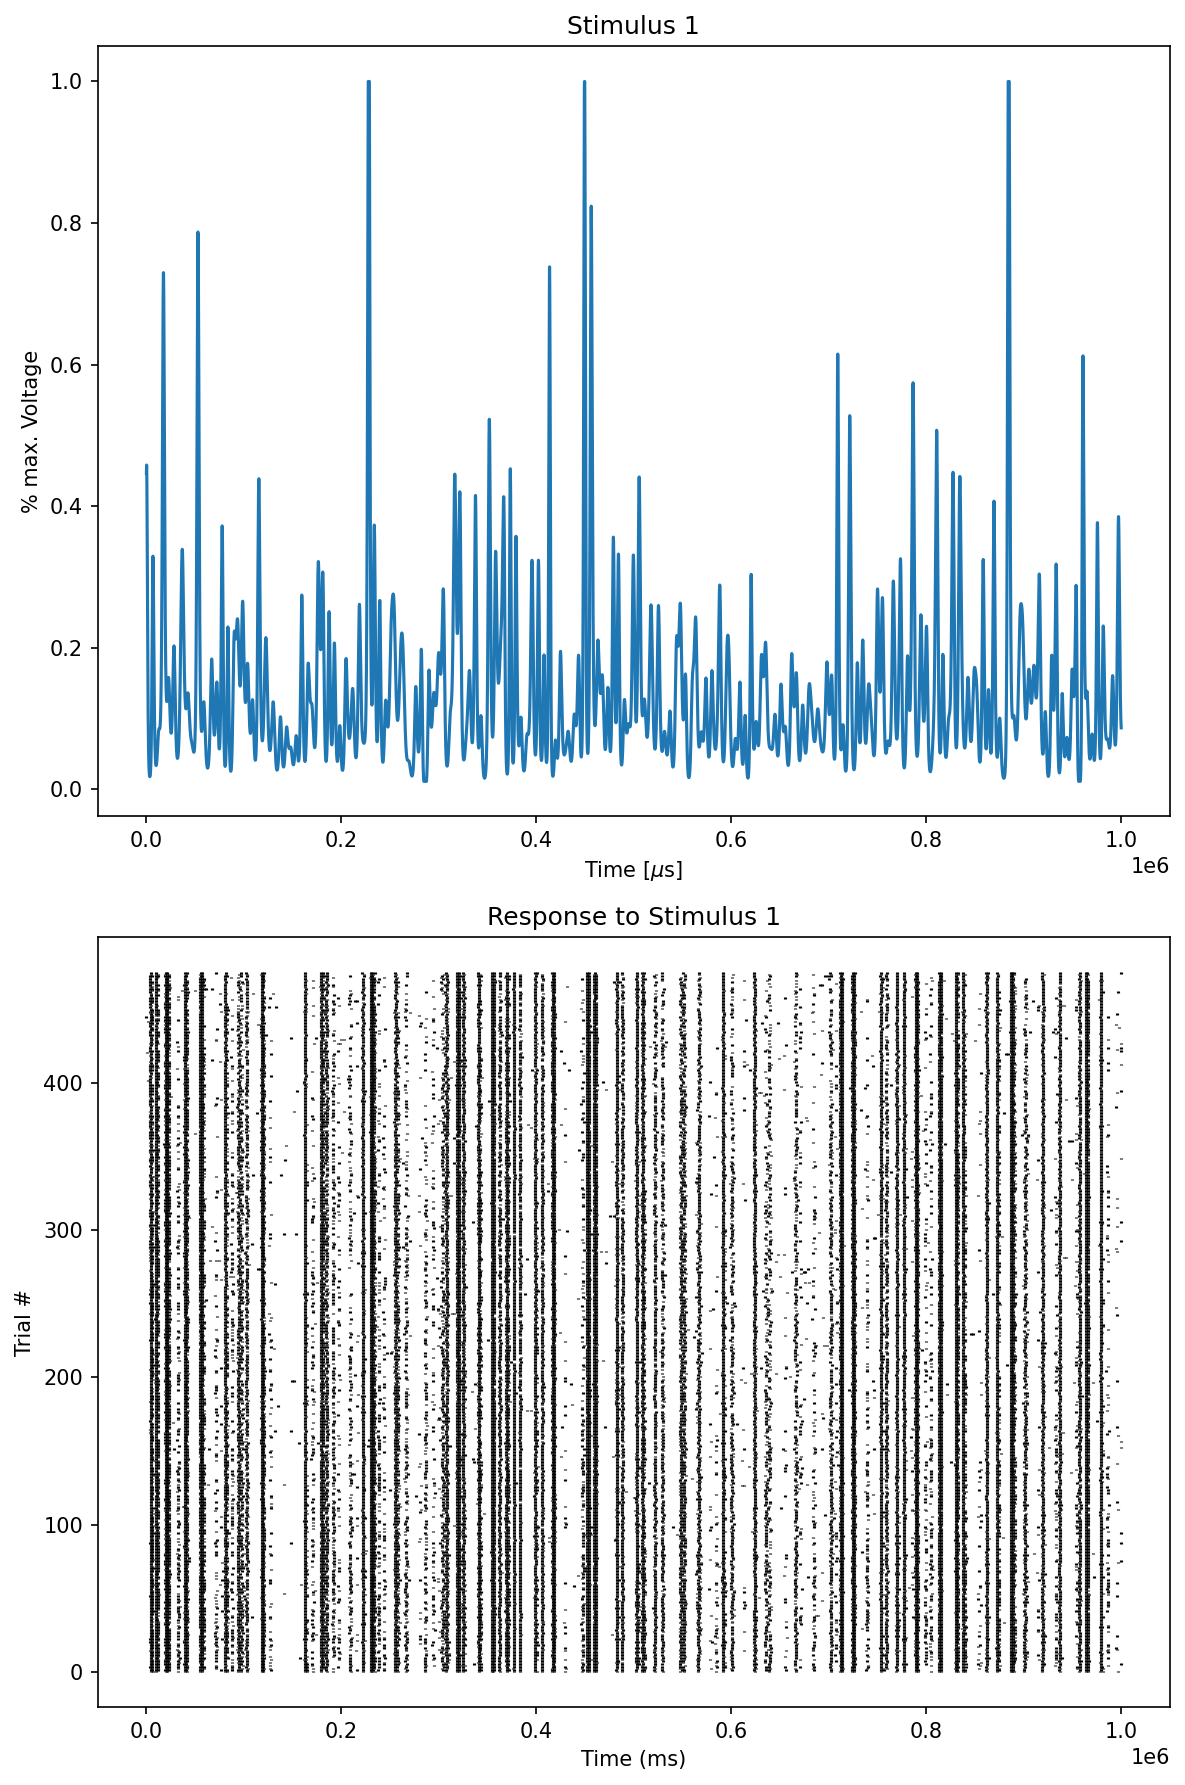

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(8, 12), dpi=150)
for i, st in enumerate(spikes1.values()):
    st = np.array(st)
    st = st[st<1.e6]
    ax[1].vlines(st, i, i+1, color='k')
    
ax[0].plot(t[mask],s[mask])
ax[0].set_xlabel('Time [$\mu$s]')
ax[0].set_ylabel('% max. Voltage')

ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Trial #')
#ax[2].set_xlabel('Time (ms)')

ax[0].set_title('Stimulus 1')
ax[1].set_title('Response to Stimulus 1')
#ax[2].set_title('Response to Stimulus 1')

for i in range(2):
    ax[i].set_xlim(-.5e5, 1.05e6)

plt.tight_layout()

## Visualisieren der Stimuli <a name="vis_stim"></a>
Als Stimuli wurden neun Gaussverteilungen mit variierenden 
<br> Die Funktion "stimtodB.m" wird verwendet um die Daten der Stimuli in Dezibel umzuwandeln. <!-- Beschreibung Stimuli -->
Um die Stimuli zu visualisieren erstellen wir deren Plots und Power-Spectral Density.

## Visualisieren der Stimuli <a name="vis_stim"></a>
Als Stimuli wurden neun Gaussverteilungen mit variierenden Standardabweichungen (st) und Cutoff-Frequenzen (co) verwendet.
<br> Die Funktion "stimtodB.m" wird in Python umgeschrieben und verwendet um die Daten der Stimuli in Dezibel umzuwandeln. <!-- Beschreibung Stimuli -->
Um die Stimuli zu visualisieren erstellen wir deren Plots und Power-Spectral Density.

In [29]:
def volt2dB(stim, maxdB=100):
    stim = (20 * 1 / np.log(10)) * (np.log(stim[:, 1] / 2.0e-5))
    return maxdB - stim.max() + stim

#stimulus = volt2dB(stimulus, maxdB=76.4286) # maxdB was taken from the spike file header 

In [30]:
def find_rate(name):
    try:
        with open('./Resources/data/firing_rates', 'r') as file:
            lines = file.readlines()

            for i, line in enumerate(lines):
                if name in line:
                    # Check if there are two lines below the current line
                    if i + 2 < len(lines):
                        result = re.search(r'firing rate = (\S+)', lines[i + 2].strip()).group(1)  # Remove leading/trailing whitespaces while stripping the output to just return the rate
                        return float(result)
                    else:
                        print("Target string found, but there are not enough lines below.")
                        return None

            print(f"Target string '{name}' not found.")
            return None

    except FileNotFoundError:
        print(f"File '{name}' not found.")
        return None

In [31]:
def get_n(name): # likely redundant
    try:
        with open('./Resources/data/firing_rates', 'r') as file:
            lines = file.readlines()

            for i, line in enumerate(lines):
                if name in line:
                    # Check if there are two lines below the current line
                    if i + 2 < len(lines):
                        # Use regular expression to extract the integer following "n="
                        n_value_match = re.search(r'\(n=(\d+)\)', lines[i + 2].strip())

                        if n_value_match:
                            n_value = int(n_value_match.group(1))
                            return n_value
                        else:
                            print(f"Failed to extract 'n=' value from the line:\n{lines[i + 2].strip()}")
                            return None
                    else:
                        print("Target string found, but there are not enough lines below.")
                        return None

            print(f"Target string '{name}' not found.")
            return None

    except FileNotFoundError:
        print(f"File '{name}' not found.")
        return None

In [32]:
# Example usage:
print(find_rate("03-01-15-ab_sig1_spikes"))
print(get_n("03-01-15-ab_sig1_spikes"))

39.32
476


# ROC-Curve
Um die Receiver-Operating-Characteristic Curve zu erstellen müssen zunächst die size alpha und die power beta definiert werden, welche wiederum von der Wahrscheinlichkeit für true und false positives abhängig sind. Die Eigenschaft mit der die Stimuli unterschieden werden ist die mittlere Feurerrate, welche mit der Funktion findrate() je nach Messung ausgelesen werden kann. Als "true positive" gilt die Wahrscheinlichkeit das bei Präsentation des ersten, einem Grasshüpfergesang ähnlichen Signal, ein bestimmter Wert niedriger als die mittlere Feuerrate ist, während "false positive" im Umkehrschluss die Wahrscheinlichkeit dafür ist, das ein bestimmter Wert unter der durchschnittlichen Rate liegt obwohl der präsentierte Stimulus der gaußverteilte Stimulus 2 ist.

In [33]:
# Funktion um Carrierfrequenz von allen Werten abzuziehen
def adjust(input, carrier):
    # Reduce the set variable from all values in every array under every key
    out = {key: [value - carrier for value in values] for key, values in input.items()}

    return out

In [34]:
# Funktion um Carrierfrequenz zu finden
def find_carrier(name):
 with open(name, 'r') as file:
            for line in file:
                if "# carrier freq (kHz):" in line:
                    # Extract the number that follows the string
                    freq_str = line.split(":")[1].strip()
                    carrier_freq = float(freq_str)*1000
                    return carrier_freq


In [35]:
# Example usage
find_carrier(path+'03-02-25-aj/03-02-25-aj_sig1_spikes.dat')

5000.0

In [69]:
# Laden der spikes Dateien einer Zelle für sig1 und sig2, jedes Trial separat
# Finden der mittleren Feuerrate 

cell = '03-02-25-aj'
cell = '03-05-06-aa'

def get_avg_rate(cell, signal): # modified to not write json files
    dat_file_path = path+cell+'/'+cell+'_sig'+str(signal)+'_spikes.dat'
    #json_output_path = cell+'_sig'+str(signal)+'.json'
    json_data = adjust(parse_dat_to_json(read_dat_file(dat_file_path)), find_carrier(dat_file_path))
    #write_json_file(json_data, json_output_path)
    avg_rate = find_rate(cell+'_sig'+str(signal)+'_spikes.dat')
    sig = json_data
    #with open('./'+json_output_path, 'r') as file:
        #sig = json.load(file)

    return avg_rate, sig

sig1 = get_avg_rate('03-05-06-aa', 1)[1]
sig2 = get_avg_rate('03-05-06-aa', 2)[1]
avg_rate_1 = get_avg_rate('03-05-06-aa', 1)[0]
avg_rate_2 = get_avg_rate('03-05-06-aa', 2)[0]

print(sig1)
print(sig2)
print(avg_rate_1)
print(avg_rate_2)

{1: [2000.0, 4600.0, 9600.0, 14900.0, 20500.0, 24200.0, 32400.0, 37400.0, 43300.0, 46500.0, 55800.0, 63100.0, 75800.0, 79900.0, 83200.0, 88300.0, 103500.0, 113800.0, 124600.0, 132200.0, 141400.0, 144100.0, 147300.0, 153500.0, 177400.0, 182500.0, 194700.0, 197700.0, 204800.0, 208600.0, 214500.0, 222700.0, 227900.0, 239600.0, 250800.0, 265500.0, 281400.0, 295700.0, 299300.0, 302100.0, 308100.0, 322900.0, 332800.0, 339600.0, 348700.0, 357700.0, 364300.0, 367500.0, 381200.0, 393000.0, 396400.0, 400500.0, 408900.0, 414400.0, 423500.0, 431100.0, 446200.0, 453800.0, 457500.0, 464000.0, 470100.0, 476100.0, 479100.0, 484200.0, 492700.0, 498900.0, 510200.0, 525900.0, 533400.0, 544700.0, 551300.0, 554100.0, 559400.0, 579700.0, 585800.0, 590900.0, 602100.0, 609000.0, 612400.0, 621900.0, 628200.0, 631900.0, 655100.0, 665900.0, 669900.0, 677600.0, 685600.0, 700300.0, 712000.0, 716000.0, 721100.0, 726400.0, 737000.0, 739900.0, 744200.0, 755300.0, 766000.0, 786300.0, 789400.0, 797200.0, 809100.0, 8239

In [37]:
# Berechnung der Verteilung der Raten aus jedem Trial für beide Stimuli

def calculate_rates(data_dict, trial_length):
    rates = []

    for key, array in data_dict.items():
        rate = len(array) / trial_length
        rates.append(int(rate))

    return rates

# trial lengh ist in 1/1000 msec = 1 sec
rate_1 = calculate_rates(sig1, 1)
rate_2 = calculate_rates(sig2, 1)


write_json_file(rate_1, "r1.json")
write_json_file(rate_2, "r2.json")

print(rate_1)
print(rate_2)

[117, 125, 111, 119, 120, 113, 126, 116, 112, 114, 118, 120, 110, 123, 120, 119, 116, 123, 127, 113, 123, 121, 124, 118, 113, 123, 110, 116, 113, 114, 119, 120, 114, 121, 121, 121, 112, 112, 117, 116, 116, 118, 113, 119, 116, 113, 112, 112, 125, 116, 117, 111, 115, 117, 114, 124, 116, 119, 110, 111, 111, 118, 123, 123, 122, 126, 126, 125, 123, 126, 118, 126, 129, 124, 122, 125, 120, 125, 125, 128, 125, 128, 124, 125, 121, 117, 119, 119, 116, 115, 117, 111, 116, 125, 117, 111, 118, 118, 111, 118, 122, 123, 119, 121, 128, 118, 115, 120, 126, 123, 120, 120, 122, 124, 121, 124, 115, 125, 118, 126, 119, 119, 125, 117, 125, 113, 125]
[133, 130, 129, 130, 125, 130, 124, 129, 125, 116, 130, 128, 124, 133, 133, 131, 128, 126, 133, 119, 128, 127, 128, 117, 137, 123, 125, 132, 132, 118, 126, 117, 126, 126, 129, 124, 123, 126, 125, 124, 128, 118, 122, 126, 126, 120, 124, 123, 124, 123, 122, 124, 121, 125, 132, 125, 126, 120, 124, 130, 122, 132, 126, 139, 127, 133, 142, 127, 138, 134, 130, 133, 125

Now we have two arrays, rate_1 and rate_2 containing the firing rates of neurons over several trials. Each rate array has a respective avg_rate value, avg_rate_1 and avg_rate_2. A false positive is defined as being a value in rate_2 that is larger than avg_rate_2, a true positive is a value in rate_1 being larger than avg_rate_1.

In [91]:
# make binary arrays representing hits for true and false positives

def build_binary_array(data, condition):

    binary_array = [1 if condition(value) else 0 for value in data]
    return binary_array


tp_test = build_binary_array(rate_1, lambda x: x > avg_rate_1)
fp_test = build_binary_array(rate_2, lambda x: x > avg_rate_2)
print(tp_test)
print(fp_test)


[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]


In [92]:
# Berechnung der Wahrscheinlichkeiten mit 
# p[r > R] = (Anzahl der Trials mit diesem Stimulus mit Rate größer R)/(Gesamtanzahl der Trials für diesen Stimulus)
def compare_rate(rate, avg_rate, signal):
    bigger = sum(i > avg_rate for i in rate)
    total_trials = int(list(signal.keys())[-1])
    if total_trials != len(rate):
        print("Trial count / rate lengh mismatch!")
    p = bigger / total_trials
    return p

p1 = compare_rate(rate_1, avg_rate_1, sig1)
p2 = compare_rate(rate_2, avg_rate_2, sig2)
print(p1, p2)

0.5433070866141733 0.5118110236220472


In [93]:
def plot_roc_curve(true_positives, false_positives):
    y_true = np.concatenate([np.ones_like(true_positives), np.zeros_like(false_positives)])
    y_scores = np.concatenate([true_positives, false_positives])
    
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

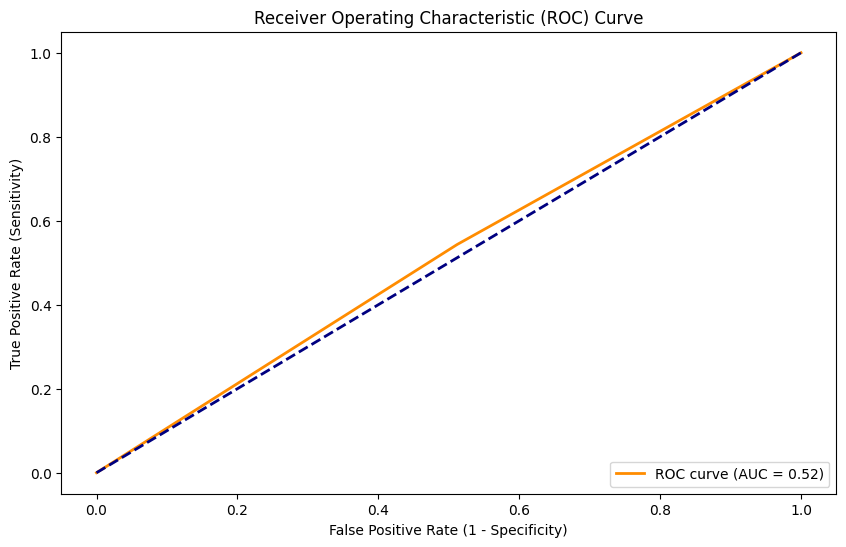

In [94]:
plot_roc_curve(tp_test, fp_test)

In [88]:
def plot_roc_curves(true_positives_list, false_positives_list, labels):
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()

    for true_positives, false_positives, label in zip(true_positives_list, false_positives_list, labels):
        y_true = np.concatenate([np.ones_like(true_positives), np.zeros_like(false_positives)])
        y_scores = np.concatenate([true_positives, false_positives])

        fpr, tpr, thresholds = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for each set of true positives and false positives
        line, = ax.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate (1 - Specificity)')
    ax.set_ylabel('True Positive Rate (Sensitivity)')
    ax.set_title('Receiver Operating Characteristic (ROC) Curves')

    # Place the legend outside the plot, stacking items side by side
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, borderaxespad=0.)

    plt.show()


In [89]:
items = os.listdir(path)
cells = [item for item in items if os.path.isdir(os.path.join(path, item)) and item != 'stimuli']

In [72]:
#cells = ['03-02-25-aj','03-01-15-aa','03-05-06-aa']
y = 0
tp = []
fp = []
set = []
for i in cells:
    y += 1
    try:
        tp.append(build_binary_array(calculate_rates(get_avg_rate(i, 1)[1], 1), lambda x: x > get_avg_rate(i, 1)[0]))
        fp.append(build_binary_array(calculate_rates(get_avg_rate(i, 2)[1], 1), lambda x: x > get_avg_rate(i, 2)[0])) 
        set.append('set '+str(y))
    except TypeError: # skip cells without annotated carrier frequency
        continue

Target string '03-06-27-ab_sig1_spikes.dat' not found.
Target string '03-06-27-ab_sig1_spikes.dat' not found.
Target string '03-06-27-ac_sig1_spikes.dat' not found.
Target string '03-06-27-ac_sig1_spikes.dat' not found.
Target string '03-06-27-ae_sig1_spikes.dat' not found.
Target string '03-06-27-ae_sig1_spikes.dat' not found.
Target string '03-06-27-af_sig1_spikes.dat' not found.
Target string '03-06-27-af_sig1_spikes.dat' not found.
Target string '03-06-27-ag_sig1_spikes.dat' not found.
Target string '03-06-27-ag_sig1_spikes.dat' not found.
Target string '03-07-03-aa_sig1_spikes.dat' not found.
Target string '03-07-03-aa_sig1_spikes.dat' not found.


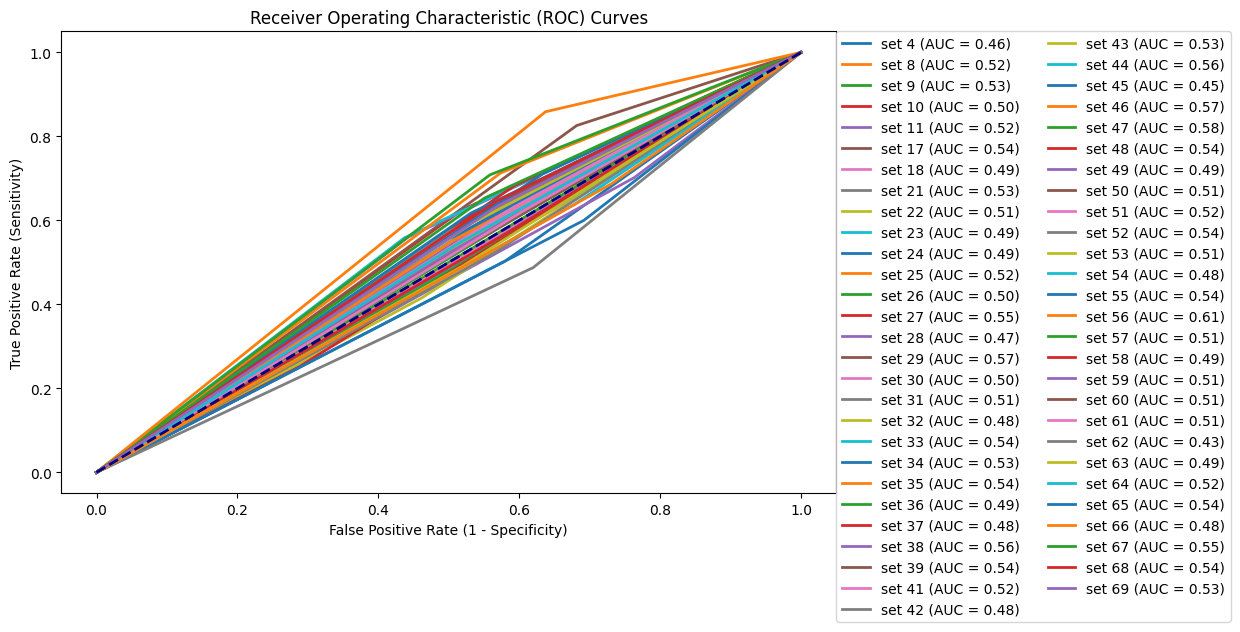

In [90]:
plot_roc_curves(tp, fp, set)